# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
import statsmodels.stats.api as sms

In [26]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [27]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


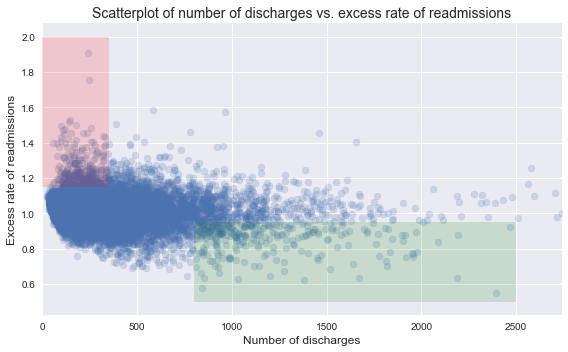

In [28]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A.Do you agree with the above analysis and recommendations? Why or why not?

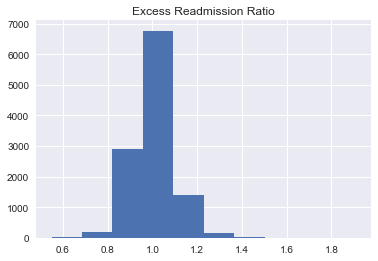

In [39]:
pd.DataFrame.hist(clean_hospital_read_df, column='Excess Readmission Ratio');

In [21]:
# Remove all null excess readmission ratios
clean_hospital_read_df = clean_hospital_read_df[np.logical_not(clean_hospital_read_df['Excess Readmission Ratio'].isnull())]
print('Number of samples: {}'.format(len(clean_hospital_read_df)))
print('Mean excess readmission ratio: {:.4f}'.format(clean_hospital_read_df['Excess Readmission Ratio'].mean()))

Number of samples: 11497
Mean excess readmission ratio: 1.0075


### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
    
### Setup an appropriate hypothesis test.

Let's inspect the above statistical claims:

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.


In [22]:
df_less_100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & (clean_hospital_read_df['Number of Discharges'] > 0)]
print('Number of samples with < 100 discharges: {}'.format(len(df_less_100)))
print('Mean excess readmission rate: {:.3f}'.format(df_less_100['Excess Readmission Ratio'].mean()))
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_less_100[df_less_100['Excess Readmission Ratio'] > 1]) 
                                                             / len(df_less_100)) * 100))

df_great_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
print('\nNumber of samples with > 1000 discharges: {}'.format(len(df_great_1000)))
print('Mean excess readmission rate: {:.3f}'.format(df_great_1000['Excess Readmission Ratio'].mean()))
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_great_1000[df_great_1000['Excess Readmission Ratio'] > 1]) 
                                                             / len(df_great_1000)) * 100))

Number of samples with < 100 discharges: 1188
Mean excess readmission rate: 1.023
Percent excess readmission rate > 1: 63.22%

Number of samples with > 1000 discharges: 463
Mean excess readmission rate: 0.978
Percent excess readmission rate > 1: 44.49%


Based on the results, the claim does seems to be true. But is the mean excess readmission rate for samples with less than 100 discharges truly greater than that for samples with greater than 1000 discharges?
H0: $M$< 100 - $M$> 1000 = 0
H1: $M$< 100 - $M$> 1000 > 0
With an alpha = 0.01. Let's calculate it.

### Compute and report the observed significance value (or p-value).

In [29]:
two_sample = st.ttest_ind(df_less_100['Excess Readmission Ratio'], 
                          df_great_1000['Excess Readmission Ratio'])
cm = sms.CompareMeans(sms.DescrStatsW(df_less_100['Excess Readmission Ratio']), 
                      sms.DescrStatsW(df_great_1000['Excess Readmission Ratio']))

print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'.format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                                                                                          cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The 99% confidence interval about the mean difference is (0.029, 0.059).
The t-statistic is 10.061 and the p-value is 0.00000000.


### Report statistical significance for $\alpha$ = .01.

Given the 99% confidence interval, t-statistic, and p-value of the one-tailed two sample t-test, we can reject the null hypothesis that the mean excess readmission rate for samples with less than 100 discharges is equal to that for samples with greater than 1000 discharges. We are 99% confident that the true mean difference lies between 0.029% and 0.059%.

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Even though all the above tests show that there is a statistical difference in excess readmission ratio between different level of dischstgrd, they are not practically significant though. It indicates that there is some kind of correlation between these measures. But this cannot be considered as a true correlation as the absolute difference is between 0.029% and 0.059%

### Revised conclusions
1. The significant correlation between hospital capacity and readmission rates is misleading. Even though the correlation is not statistically significant, it is not practically significant. 

2. The initial dataset doesn't include hospital size as an attribute. The higher discharge rate of hospital might imply it as a smaller hospital but it may not be the case. 

### Regulatory Policy Recommendations
Hospital size should be the metrics used to identify hospitals that needs upgraded resource allocation. 


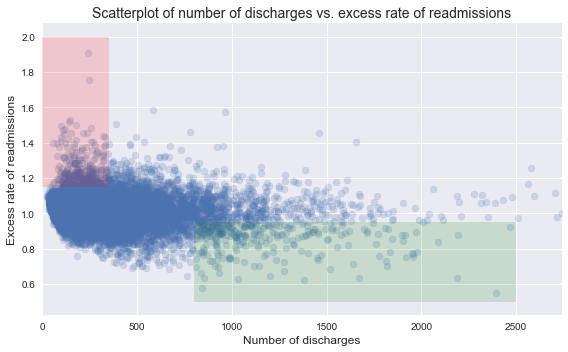

In [30]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

### Based on the scatter plot above, what are the advantages and disadvantages of using this plot to convey information?

### Advantages
- The design of the plot is neat. 
- It looks good visually and easy to read all the information projected. 
- It provides focus separately on green and the red area.

### Disadvantages
- Somehow it feels crowded with too much information scattered.
- Seems to be taking odd slices of the data between [81:-3]
- Data is projected in a misleading way against the trends. The green and red areas of focus are misleading.

### Construct another plot that conveys the same information in a more direct manner.¶

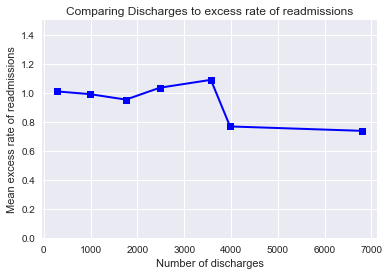

In [36]:
# Bin the data frame by 'Number of Discharges' with 10 bins
bins = np.linspace(clean_hospital_read_df['Number of Discharges'].min(), 
                   clean_hospital_read_df['Number of Discharges'].max(), 10)
groups = clean_hospital_read_df.groupby(np.digitize(clean_hospital_read_df['Number of Discharges'], bins))

#Plot the binned data by mean excess rate of readmission
plt.plot(groups.aggregate(lambda x: np.mean(x[x > 0.5]))['Number of Discharges'], 
         list(groups.aggregate(lambda x: np.mean(x[x > 0.5]))['Excess Readmission Ratio']),
         color='b', lw=2, marker='s')
plt.xlabel('Number of discharges')
plt.ylabel('Mean excess rate of readmissions')
plt.title('Comparing Discharges to excess rate of readmissions')
plt.ylim(0,1.5);